# 4.1   Back to the Basics

# 4.2   Sequences

# 4.3   Questions of Style

# 4.4   Functions: The Foundation of Structured Programming

# 4.5   Doing More with Functions

# 4.6   Program Development

# 4.7   Algorithm Design

# 4.8   A Sample of Python Libraries

## Matplotlib

In [3]:
import nltk
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

In [4]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist((genre, word) for genre in genres for word in nltk.corpus.brown.words(categories=genre) if word in modals)

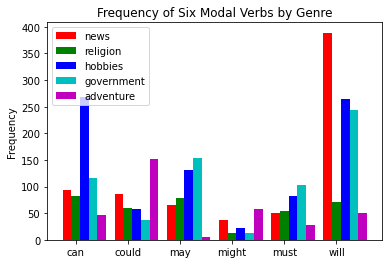

In [5]:
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [6]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

<ipython-input-12-55d9ca230610>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  matplotlib.pyplot.show()


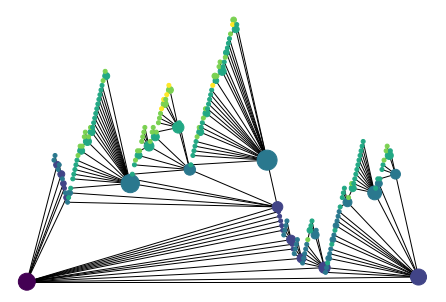

In [12]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_planar(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)